<a href="https://colab.research.google.com/github/KrungSalad/Google_Colab/blob/master/Lab_ML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import datetime as dt
from math import pow, sqrt

In [0]:
rating = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
tag = pd.read_csv('tags.csv')

ตอนที่ 1

1.3.2 Data Preparation 

In [0]:
rating['timestamp'] = pd.to_datetime(rating['timestamp'], unit='s')   #แปลงจาก UTC ให้เป็นเวลาปกติ
tag['timestamp'] = pd.to_datetime(tag['timestamp'], unit='s')

In [4]:
from sklearn.preprocessing import MultiLabelBinarizer  #้ปรับรูปแบบ  genres เป็น multi-label binarization
mlb = MultiLabelBinarizer()
s = movies['genres'].str.split("|")
genres = movies
genres.pop('genres')
genres = genres.join(pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_ , index=movies.index))
genres.drop( columns='(no genres listed)',inplace=True)
genres

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


1.4 Data Visualization

กราฟที่ 2

In [5]:
rating['year'] = pd.DatetimeIndex(rating['timestamp']).year  #สร้าง feature year แยกออกมาจาก timestamp
rating

,userId,movieId,rating,timestamp,year
0,1,1,4.0,2000-07-30 18:45:03,2000
1,1,3,4.0,2000-07-30 18:20:47,2000
2,1,6,4.0,2000-07-30 18:37:04,2000
3,1,47,5.0,2000-07-30 19:03:35,2000
4,1,50,5.0,2000-07-30 18:48:51,2000
...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,2017
100832,610,168248,5.0,2017-05-03 22:21:31,2017
100833,610,168250,5.0,2017-05-08 19:50:47,2017
100834,610,168252,5.0,2017-05-03 21:19:12,2017


In [0]:
report2 = rating[["year","rating"]].groupby("year").count()  #count rating groupby year

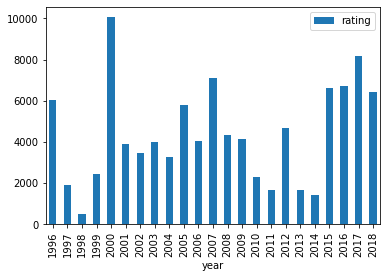

In [7]:
report2.plot.bar()

กราฟที่ 3

In [0]:
data = np.array([genres['Action'].sum(),genres['Adventure'].sum(),genres['Animation'].sum(),genres['Children'].sum(),genres['Comedy'].sum(),genres['Crime'].sum(),genres['Documentary'].sum(),genres['Drama'].sum(),genres['Fantasy'].sum(),genres['Film-Noir'].sum(),genres['Horror'].sum(),genres['IMAX'].sum(),genres['Musical'].sum(),genres['Mystery'].sum(),genres['Romance'].sum(),genres['Sci-Fi'].sum(),genres['Thriller'].sum(),genres['War'].sum(),genres['Western'].sum()])
index = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
report3 = pd.DataFrame(data,index = index)  #รวม genres ของแต่ละอัน แล้วเอามาสร้างเป็น dataframe ใหม่

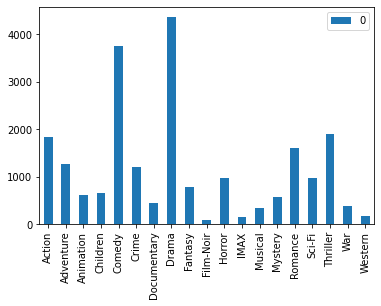

In [9]:
report3.plot.bar()

กราฟที่ 4

In [0]:
genres['year'] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False)  # แยก year ออกมาจาก title
#Removing the parentheses.
genres['year'] = genres.year.str.extract('(\d\d\d\d)',expand=False)
# Note that expand=False simply means do not add this adjustment as an additional column to the data frame.
#Removing the years from the 'title' column.
movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending white space characters that may have appeared, using lambda function.
movies['title'] = movies['title'].apply(lambda x: x.strip())

In [0]:
report4 = genres[['year','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].groupby("year").sum()

<Figure size 1584x7200 with 0 Axes>

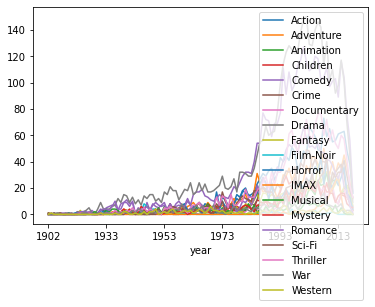

In [12]:

plt.figure(figsize=(22,100))
report4.plot()
plt.legend()


In [13]:
rating

,userId,movieId,rating,timestamp,year
0,1,1,4.0,2000-07-30 18:45:03,2000
1,1,3,4.0,2000-07-30 18:20:47,2000
2,1,6,4.0,2000-07-30 18:37:04,2000
3,1,47,5.0,2000-07-30 19:03:35,2000
4,1,50,5.0,2000-07-30 18:48:51,2000
...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,2017
100832,610,168248,5.0,2017-05-03 22:21:31,2017
100833,610,168250,5.0,2017-05-08 19:50:47,2017
100834,610,168252,5.0,2017-05-03 21:19:12,2017


กราฟที่ 5

In [0]:
a = rating[["movieId","rating"]].groupby("movieId").mean()  # หา mean rating ของแต่ละ movie
a['Id'] = a.index.to_frame()

In [15]:
report5 = a[["rating","Id"]].groupby("rating").count() # หาจำนวนของ movie ที่ได้ rating 0-5
report5

,Id
rating,
0.500000,96
0.750000,7
0.800000,1
0.833333,4
1.000000,150
...,...
4.700000,1
4.750000,29
4.833333,2


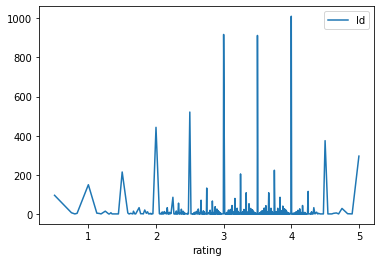

In [16]:
report5.plot()

ตอนที่ 2 

In [17]:
rating

,userId,movieId,rating,timestamp,year
0,1,1,4.0,2000-07-30 18:45:03,2000
1,1,3,4.0,2000-07-30 18:20:47,2000
2,1,6,4.0,2000-07-30 18:37:04,2000
3,1,47,5.0,2000-07-30 19:03:35,2000
4,1,50,5.0,2000-07-30 18:48:51,2000
...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,2017
100832,610,168248,5.0,2017-05-03 22:21:31,2017
100833,610,168250,5.0,2017-05-08 19:50:47,2017
100834,610,168252,5.0,2017-05-03 21:19:12,2017


ตอนที่ 2.1

In [18]:
# สร้างข้อมูลความชอบของผู้ใช้แต่ละคน (user_ matrix) #
user_matrix = rating.pivot(index='userId', columns='movieId', values='rating')
user_matrix = user_matrix.fillna(0.0)
user_matrix

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,2.5,0.0,0.0,0.0,3.5,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,4.5,0.0,0.0,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,2.0,0.0,3.5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.5,3.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ตอนที่ 2.2

In [0]:
#สุ่มหยิบข้อมูล user_matrix มาจำนวน 22
user_random = user_matrix.sample(n=22, random_state=98) #max 98 min 1

In [0]:
# คำนวณความคล้ายของความชอบ movie ของคู่ user โดยใช้ตัววัด cosine_similarity()
from sklearn.metrics.pairwise import cosine_similarity 
cosine_sim = pd.DataFrame(cosine_similarity(X = user_random) , index = user_random.index , columns=user_random.index.T)

In [0]:
#คำนวณความคล้ายของความชอบ movie ของคู่ user โดยใช้ตัววัด Pearson’s similarity() 
Pearson_sim = pd.DataFrame(user_random.T.corr ( method ='pearson' ) , index = user_random.index , columns=user_random.index.T)

In [22]:
display(cosine_sim)
display(Pearson_sim)

userId,418,118,443,180,382,186,311,301,188,268,232,234,550,91,104,230,395,474,53,471,165,417
userId,,,,,,,,,,,,,,,,,,,,,,
418,1.000000,0.077585,0.291901,0.095883,0.188895,0.050389,0.008460,0.170275,0.036219,0.063776,0.143424,0.049308,0.096471,0.192501,0.164149,0.111286,0.052870,0.141560,0.000000,0.125777,0.032558,0.289344
118,0.077585,1.000000,0.102376,0.117643,0.089412,0.017617,0.000000,0.130101,0.035307,0.156067,0.080710,0.060759,0.000000,0.128839,0.038164,0.054330,0.070799,0.107989,0.000000,0.088806,0.108658,0.177671
443,0.291901,0.102376,1.000000,0.150001,0.171698,0.071645,0.000000,0.134413,0.046809,0.103504,0.126549,0.052176,0.139683,0.130879,0.104456,0.107881,0.071349,0.091382,0.000000,0.185777,0.076525,0.337332
180,0.095883,0.117643,0.150001,1.000000,0.111407,0.166400,0.000000,0.000000,0.000000,0.186237,0.097581,0.120999,0.039772,0.199907,0.042488,0.035250,0.000000,0.092045,0.000000,0.081121,0.134640,0.133594
382,0.188895,0.089412,0.171698,0.111407,1.000000,0.123191,0.027829,0.112155,0.011585,0.084453,0.246694,0.116109,0.188849,0.163751,0.196276,0.135906,0.060660,0.138719,0.012453,0.153129,0.119940,0.182667
186,0.050389,0.017617,0.071645,0.166400,0.123191,1.000000,0.028237,0.115941,0.101881,0.094809,0.169184,0.285856,0.021473,0.308098,0.150508,0.178212,0.130305,0.232114,0.032493,0.039038,0.128078,0.074402
311,0.008460,0.000000,0.000000,0.000000,0.027829,0.028237,1.000000,0.060055,0.013859,0.045678,0.064457,0.028785,0.000000,0.137816,0.034294,0.105646,0.034740,0.077871,0.000000,0.034176,0.040447,0.038585
301,0.170275,0.130101,0.134413,0.000000,0.112155,0.115941,0.060055,1.000000,0.030011,0.085777,0.223381,0.089297,0.038227,0.223248,0.229809,0.260219,0.151521,0.204115,0.000000,0.173170,0.101002,0.177069
188,0.036219,0.035307,0.046809,0.000000,0.011585,0.101881,0.013859,0.030011,1.000000,0.065775,0.033842,0.037282,0.029177,0.055024,0.073639,0.000000,0.019685,0.141000,0.000000,0.023239,0.013335,0.027986


userId,418,118,443,180,382,186,311,301,188,268,232,234,550,91,104,230,395,474,53,471,165,417
userId,,,,,,,,,,,,,,,,,,,,,,
418,1.000000,0.073765,0.288140,0.091978,0.177136,0.037320,0.004195,0.162586,0.030155,0.054605,0.122978,0.037352,0.092222,0.176974,0.152016,0.102259,0.046279,0.113340,-0.004121,0.121681,0.025503,0.284050
118,0.073765,1.000000,0.099857,0.115647,0.082978,0.010736,-0.002208,0.126164,0.032201,0.152119,0.070330,0.054936,-0.002449,0.121468,0.031009,0.049509,0.067515,0.097620,-0.002112,0.086571,0.105388,0.174638
443,0.288140,0.099857,1.000000,0.147508,0.164279,0.063358,-0.002875,0.129169,0.042803,0.097754,0.114121,0.044344,0.136944,0.120290,0.096028,0.101960,0.067043,0.071931,-0.002750,0.183181,0.072046,0.334110
180,0.091978,0.115647,0.147508,1.000000,0.104963,0.161103,-0.002308,-0.004971,-0.003375,0.182290,0.087351,0.115542,0.037314,0.194157,0.035052,0.030057,-0.003730,0.078669,-0.002207,0.078765,0.131327,0.130206
382,0.177136,0.082978,0.164279,0.104963,1.000000,0.100837,0.020317,0.097224,0.000181,0.068079,0.210736,0.095602,0.182936,0.130585,0.174002,0.119911,0.048866,0.072984,0.005056,0.146655,0.108572,0.172088
186,0.037320,0.010736,0.063358,0.161103,0.100837,1.000000,0.021348,0.102284,0.092711,0.079971,0.132565,0.270700,0.013712,0.283832,0.128997,0.164274,0.120487,0.185828,0.025971,0.031489,0.117710,0.062961
311,0.004195,-0.002208,-0.002875,-0.002308,0.020317,0.021348,1.000000,0.055583,0.010614,0.040868,0.053045,0.022488,-0.002499,0.130490,0.026926,0.101102,0.031239,0.063338,-0.002155,0.031758,0.036808,0.034856
301,0.162586,0.126164,0.129169,-0.004971,0.097224,0.102284,0.055583,1.000000,0.023144,0.075683,0.203652,0.076397,0.033097,0.206224,0.217202,0.251745,0.144915,0.178208,-0.004641,0.168921,0.093641,0.170186
188,0.030155,0.032201,0.042803,-0.003375,0.000181,0.092711,0.010614,0.023144,1.000000,0.058819,0.014420,0.028071,0.025634,0.040038,0.063309,-0.007788,0.014466,0.123277,-0.003151,0.019666,0.007833,0.022441


ตอนที่ 2.3

In [23]:
#ตาราง user ที่มีความชอบคล้ายกันที่สุด 5 อันดับเทียบจาก cosine_similarity
aa = cosine_sim - np.eye(22)
cosine_sort = aa.idxmax().reset_index()
cosine_sort.columns=['Id1', 'Id2']
cosine_sort['cosine_similarity'] = cosine_sim.lookup(cosine_sort['Id1'], cosine_sort['Id2'])
cosine_sort.sort_values('cosine_similarity' , ascending=False , inplace=True)
cosine_like_5 = cosine_sort.head(5)
cosine_like_5

,Id1,Id2,cosine_similarity
21,417,443,0.337332
2,443,417,0.337332
17,474,91,0.319062
13,91,474,0.319062
5,186,91,0.308098


In [24]:
#ตาราง user ที่มีความชอบคล้ายกันที่สุด 5 อันดับเทียบจาก Pearson_similarity
bb = Pearson_sim - np.eye(22)
pearson_sort = bb.idxmax().reset_index()
pearson_sort.columns=['Id1', 'Id2']
pearson_sort['pearson similarity'] = Pearson_sim.lookup(pearson_sort['Id1'], pearson_sort['Id2'])
pearson_sort.sort_values('pearson similarity' , ascending=False , inplace=True)
pearson_like_5 = pearson_sort.head(5)
pearson_like_5

,Id1,Id2,pearson similarity
21,417,443,0.334110
2,443,417,0.334110
0,418,443,0.288140
13,91,186,0.283832
5,186,91,0.283832


In [25]:
#ตาราง user ที่มีความชอบตรงกันข้ามกันที่สุด 5 อันดับเทียบจาก Pearson_similarity
unlike = Pearson_sim + np.eye(22)
pearson_sort_min = unlike.idxmin().reset_index()
pearson_sort_min.columns=['Id1', 'Id2']
pearson_sort_min['pearson similarity'] = Pearson_sim.lookup(pearson_sort_min['Id1'], pearson_sort_min['Id2'])
pearson_sort_min.sort_values('pearson similarity' , inplace=True)
pearson_unlike_5 = pearson_sort_min.head(5)
pearson_unlike_5

,Id1,Id2,pearson similarity
15,230,188,-0.007788
8,188,230,-0.007788
18,53,104,-0.007532
14,104,53,-0.007532
10,232,53,-0.005400


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


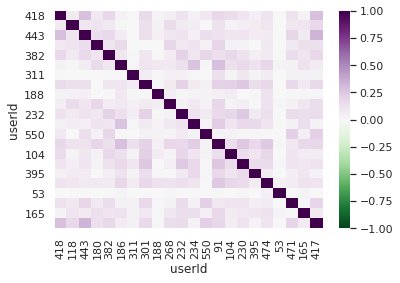

In [26]:
#กราฟความชอบของ user
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
ax = sns.heatmap(Pearson_sim, cmap="PRGn_r", vmin=-1, vmax=1)

ตอนที่ 2.4

In [27]:
Pearson_sim.head()

userId,418,118,443,180,382,186,311,301,188,268,232,234,550,91,104,230,395,474,53,471,165,417
userId,,,,,,,,,,,,,,,,,,,,,,
418,1.000000,0.073765,0.288140,0.091978,0.177136,0.037320,0.004195,0.162586,0.030155,0.054605,0.122978,0.037352,0.092222,0.176974,0.152016,0.102259,0.046279,0.113340,-0.004121,0.121681,0.025503,0.284050
118,0.073765,1.000000,0.099857,0.115647,0.082978,0.010736,-0.002208,0.126164,0.032201,0.152119,0.070330,0.054936,-0.002449,0.121468,0.031009,0.049509,0.067515,0.097620,-0.002112,0.086571,0.105388,0.174638
443,0.288140,0.099857,1.000000,0.147508,0.164279,0.063358,-0.002875,0.129169,0.042803,0.097754,0.114121,0.044344,0.136944,0.120290,0.096028,0.101960,0.067043,0.071931,-0.002750,0.183181,0.072046,0.334110
180,0.091978,0.115647,0.147508,1.000000,0.104963,0.161103,-0.002308,-0.004971,-0.003375,0.182290,0.087351,0.115542,0.037314,0.194157,0.035052,0.030057,-0.003730,0.078669,-0.002207,0.078765,0.131327,0.130206
382,0.177136,0.082978,0.164279,0.104963,1.000000,0.100837,0.020317,0.097224,0.000181,0.068079,0.210736,0.095602,0.182936,0.130585,0.174002,0.119911,0.048866,0.072984,0.005056,0.146655,0.108572,0.172088


ตอนที่ 2.4.1

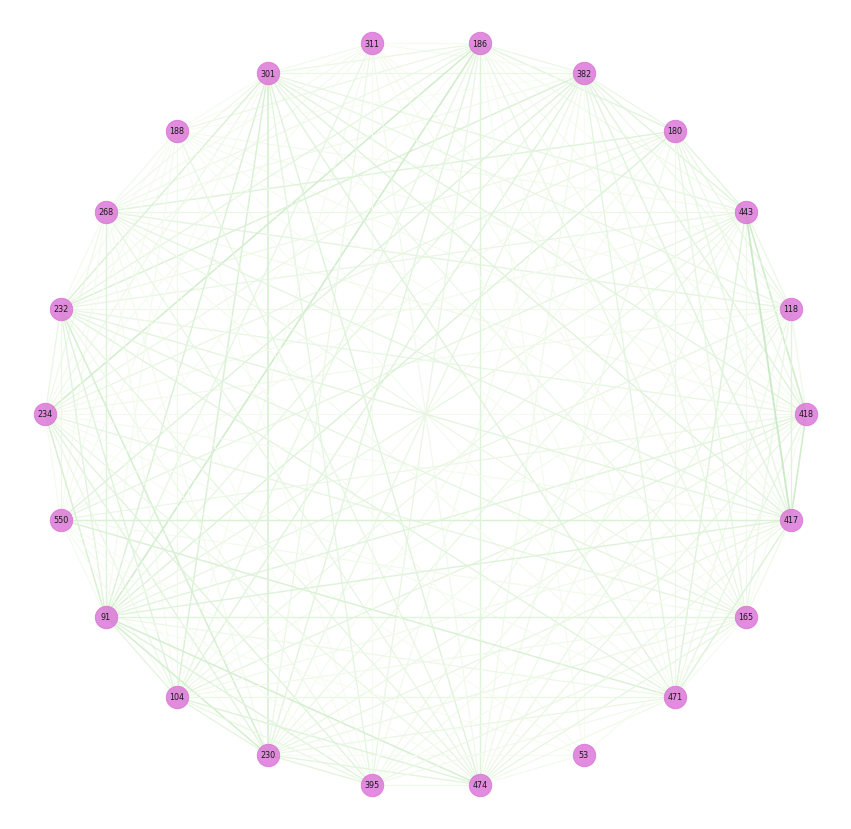

In [28]:
from networkx import nx 
from matplotlib.lines import Line2D 


#extracts the indices from the correlation matrix, which are the stocks
stocks = Pearson_sim.index.values

#Changes from dataframe to matrix, so it is easier to create a graph with networkx
Pearson_sim = np.asmatrix(Pearson_sim)

#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(Pearson_sim)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: stocks[x])

#Shows the first 5 edges with their corresponding edges
G.edges(data=True)

def create_corr_network(G, corr_direction):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0
        if corr_direction == "positive":
            if weight["weight"] <0:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            if weight["weight"] >=0:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6', 
                           node_size=500,alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edge_list=edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    #plt.savefig("part3" + corr_direction + ".png", format="PNG")
    plt.show()
create_corr_network(G, corr_direction="positive")

ตอนที่ 2.4.2/3 เปลี่ยน pearson_sort --> pearson_sort_min

In [29]:
pearson_sort

,Id1,Id2,pearson similarity
21,417,443,0.334110
2,443,417,0.334110
0,418,443,0.288140
13,91,186,0.283832
5,186,91,0.283832
11,234,186,0.270700
15,230,91,0.257001
7,301,230,0.251745
17,474,91,0.245994
10,232,230,0.244894


In [0]:
report_2_4_2 = pearson_sort.sort_values('Id1')
rating_max = rating[["userId","rating"]].groupby("userId").max()
report_2_4_2.index = report_2_4_2['Id2']


In [0]:
report_2_4_2 = report_2_4_2.join(rating_max)

In [32]:
movies_rat_max = rating[['userId','movieId']][rating.rating == rating.rating.max()]
movies_rat_max = movies_rat_max[['userId','movieId']].groupby('userId').min()
movies_rat_max

,movieId
userId,
1,47
2,60756
3,849
4,125
5,58
...,...
605,150
606,232
607,110


In [0]:
report_2_4_2 = report_2_4_2.join(movies_rat_max)

In [0]:
movies.index = movies['movieId']
report_2_4_2.index = report_2_4_2['movieId']

In [35]:
report_2_4_2

,Id1,Id2,pearson similarity,rating,movieId
movieId,,,,,
6.0,165,91,0.175653,5.0,6.0
6.0,180,91,0.194157,5.0,6.0
6.0,186,91,0.283832,5.0,6.0
6.0,230,91,0.257001,5.0,6.0
6.0,311,91,0.130490,5.0,6.0
6.0,395,91,0.176676,5.0,6.0
6.0,474,91,0.245994,5.0,6.0
NaN,268,180,0.182290,4.5,NaN
317.0,91,186,0.283832,5.0,317.0


In [0]:
movies = movies['title']

In [0]:
report_2_4_2 = report_2_4_2.join(movies)
report_2_4_2.index = report_2_4_2['Id1']


In [0]:
report_2_4_2 = report_2_4_2[['Id2','title','rating']]

In [39]:
report_2_4_2

,Id2,title,rating
Id1,,,
165,91,Heat,5.0
180,91,Heat,5.0
186,91,Heat,5.0
230,91,Heat,5.0
311,91,Heat,5.0
395,91,Heat,5.0
474,91,Heat,5.0
53,474,Sense and Sensibility,5.0
188,474,Sense and Sensibility,5.0


ตอนที่ 3

ตอนที่ 3.1.1

In [0]:
gen = genres[['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','IMAX','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']]
gen.index = genres['movieId']
genres_random = gen.sample(n=22, random_state=27)

In [41]:
genres_random.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,
125974,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4410,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
71129,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
83374,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


ตอนที่ 3.1.2

In [0]:
from sklearn.metrics.pairwise import cosine_similarity 
movie_cosine_sim = pd.DataFrame(cosine_similarity(X = genres_random) , index = genres_random.index , columns=genres_random.index.T)

ตอนที่ 3.1.3

In [0]:
movie_Pearson_sim = pd.DataFrame(genres_random.T.corr ( method ='pearson' ) , index = genres_random.index , columns=genres_random.index.T)

In [44]:
display(movie_cosine_sim)
display(movie_Pearson_sim)

movieId,125974,4410,6996,71129,83374,782,110591,109846,762,4641,8626,4735,8814,96610,43396,102084,1812,2020,78209,1034,60894,32179
movieId,,,,,,,,,,,,,,,,,,,,,,
125974,1.000000,0.288675,0.000000,0.447214,0.288675,0.000000,0.000000,0.577350,0.353553,0.353553,0.000000,0.000000,0.500000,0.000000,0.000000,0.288675,0.577350,0.000000,0.500000,0.250000,0.000000,0.000000
4410,0.288675,1.000000,0.000000,0.000000,0.000000,0.408248,0.000000,0.333333,0.816497,0.816497,0.000000,0.000000,0.577350,0.333333,0.577350,0.000000,0.666667,0.408248,0.577350,0.866025,0.333333,0.666667
6996,0.000000,0.000000,1.000000,0.632456,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.408248,0.000000,0.816497,0.000000,0.408248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
71129,0.447214,0.000000,0.632456,1.000000,0.516398,0.000000,0.000000,0.516398,0.000000,0.000000,0.316228,0.258199,0.000000,0.516398,0.000000,0.774597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
83374,0.288675,0.000000,0.408248,0.516398,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
782,0.000000,0.408248,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.408248,0.000000,0.000000,0.707107,0.000000,0.408248,0.500000,0.000000,0.707107,0.408248,0.816497
110591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.707107,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
109846,0.577350,0.333333,0.000000,0.516398,0.000000,0.000000,0.000000,1.000000,0.408248,0.408248,0.000000,0.000000,0.577350,0.000000,0.000000,0.333333,0.333333,0.000000,0.577350,0.288675,0.000000,0.000000
762,0.353553,0.816497,0.000000,0.000000,0.000000,0.000000,0.000000,0.408248,1.000000,0.500000,0.000000,0.000000,0.707107,0.408248,0.000000,0.000000,0.408248,0.000000,0.707107,0.707107,0.000000,0.408248


movieId,125974,4410,6996,71129,83374,782,110591,109846,762,4641,8626,4735,8814,96610,43396,102084,1812,2020,78209,1034,60894,32179
movieId,,,,,,,,,,,,,,,,,,,,,,
125974,1.000000,0.130437,-0.177123,0.277746,0.130437,-0.177123,-0.121716,0.484481,0.243544,0.243544,-0.177123,-0.223607,0.456435,-0.223607,-0.121716,0.130437,0.484481,-0.177123,0.456435,0.050000,-0.223607,-0.223607
4410,0.130437,1.000000,-0.148522,-0.258775,-0.187500,0.321798,-0.102062,0.208333,0.792118,0.792118,-0.148522,-0.187500,0.544331,0.208333,0.544331,-0.187500,0.604167,0.321798,0.544331,0.838525,0.208333,0.604167
6996,-0.177123,-0.148522,1.000000,0.573944,0.321798,-0.117647,-0.080845,-0.148522,-0.117647,-0.117647,0.441176,0.321798,-0.080845,0.792118,-0.080845,0.321798,-0.148522,-0.117647,-0.080845,-0.177123,-0.148522,-0.148522
71129,0.277746,-0.258775,0.573944,1.000000,0.396788,-0.204980,-0.140859,0.396788,-0.204980,-0.204980,0.184482,0.069007,-0.140859,0.396788,-0.140859,0.724569,-0.258775,-0.204980,-0.140859,-0.308607,-0.258775,-0.258775
83374,0.130437,-0.187500,0.321798,0.396788,1.000000,-0.148522,-0.102062,-0.187500,-0.148522,-0.148522,-0.148522,-0.187500,-0.102062,0.208333,-0.102062,0.604167,-0.187500,-0.148522,-0.102062,-0.223607,-0.187500,-0.187500
782,-0.177123,0.321798,-0.117647,-0.204980,-0.148522,1.000000,-0.080845,-0.148522,-0.117647,0.441176,-0.117647,0.321798,-0.080845,-0.148522,0.687184,-0.148522,0.321798,0.441176,-0.080845,0.664211,0.321798,0.792118
110591,-0.121716,-0.102062,-0.080845,-0.140859,-0.102062,-0.080845,1.000000,-0.102062,-0.080845,-0.080845,0.687184,0.544331,-0.055556,-0.102062,-0.055556,-0.102062,-0.102062,-0.080845,-0.055556,-0.121716,-0.102062,-0.102062
109846,0.484481,0.208333,-0.148522,0.396788,-0.187500,-0.148522,-0.102062,1.000000,0.321798,0.321798,-0.148522,-0.187500,0.544331,-0.187500,-0.102062,0.208333,0.208333,-0.148522,0.544331,0.130437,-0.187500,-0.187500
762,0.243544,0.792118,-0.117647,-0.204980,-0.148522,-0.117647,-0.080845,0.321798,1.000000,0.441176,-0.117647,-0.148522,0.687184,0.321798,-0.080845,-0.148522,0.321798,-0.117647,0.687184,0.664211,-0.148522,0.321798


ตอนที่ 3.2.1

In [45]:
bb = movie_Pearson_sim - np.eye(22)
movie_pearson_sort = bb.idxmax().reset_index()
movie_pearson_sort.columns=['movie1', 'movie2']
movie_pearson_sort['pearson similarity'] = movie_Pearson_sim.lookup(movie_pearson_sort['movie1'], movie_pearson_sort['movie2'])
movie_pearson_sort.sort_values('pearson similarity' , ascending=False , inplace=True)
movie_pearson_like_5 = movie_pearson_sort.head(5)
movie_pearson_like_5

,movie1,movie2,pearson similarity
18,78209,8814,1.000000
12,8814,78209,1.000000
1,4410,1034,0.838525
19,1034,4410,0.838525
21,32179,1034,0.838525


ตอนที่ 3.2.2

In [46]:
unlike = movie_Pearson_sim + np.eye(22)
movie_pearson_sort_min = unlike.idxmin().reset_index()
movie_pearson_sort_min.columns=['movie1', 'movie2']
movie_pearson_sort_min['pearson similarity'] = movie_Pearson_sim.lookup(movie_pearson_sort_min['movie1'], movie_pearson_sort_min['movie2'])
movie_pearson_sort_min.sort_values('pearson similarity' , inplace=True)
pearson_unlike_5 = movie_pearson_sort_min.head(5)
pearson_unlike_5

,movie1,movie2,pearson similarity
19,1034,71129,-0.308607
3,71129,1034,-0.308607
20,60894,71129,-0.258775
21,32179,71129,-0.258775
1,4410,71129,-0.258775


ตอนที่ 3.2.3

In [0]:
z = rating[['movieId','userId']][rating['rating']>3].groupby('movieId').min()

In [0]:
report_3_2_3 = movie_pearson_sort.join(z)

In [49]:
report_3_2_3

,movie1,movie2,pearson similarity,userId
18,78209,8814,1.000000,44.0
12,8814,78209,1.000000,274.0
1,4410,1034,0.838525,1.0
19,1034,4410,0.838525,45.0
21,32179,1034,0.838525,5.0
16,1812,4641,0.792118,6.0
8,762,4410,0.792118,43.0
9,4641,4410,0.792118,151.0
20,60894,2020,0.792118,239.0
17,2020,60894,0.792118,6.0


In [0]:
report1 = genres[['year','title']].groupby('year').count()

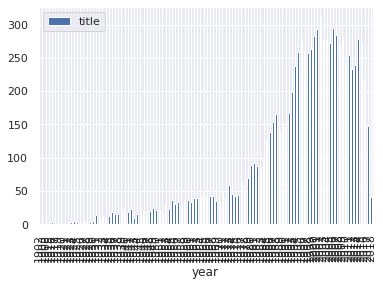

In [52]:
report1.plot.bar()